In [1]:
import pandas as pd
import pickle
from nltk import FreqDist
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

from gensim.models.keyedvectors import KeyedVectors

from tensorflow.keras.layers import Flatten,Embedding,Dense
from tensorflow.keras.layers import TextVectorization
from tensorflow import keras



# machine learning
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
poptypes_df = pd.read_csv("../data/poptypes_df.csv")
poptypes = poptypes_df["poptype"].tolist()
poptypes

['right-wing',
 'left-wing',
 'nationalist',
 'nativist',
 'radical',
 'moderate',
 'authoritatian',
 'inclusive',
 'exclusive',
 'neoliberal']

In [2]:
with open("../data/concs_labeled_min.pickle", "rb") as f:
    concs_labeled = pickle.load(f)

In [3]:
concs_labeled[:10]

[(['legislative',
   'election',
   'substantial',
   'body',
   'research',
   'document',
   'connection',
   'political',
   'discontent',
   'populist',
   'voting',
   'expectation',
   'group',
   'relatively',
   'engaged',
   'voter',
   'non-abstaining',
   'mainstream',
   'party',
   'supporter'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['degree',
   'empirical',
   'validation',
   'latent',
   'disaﬀection',
   'measure',
   'disaﬀected',
   'regression',
   'propensity',
   'vote',
   'populist',
   'party',
   'mainstream',
   'voter',
   'error',
   'disaﬀection',
   'disaﬀection',
   'political',
   'interest',
   'prospective'],
  'nationalist',
  '2020',
  'Bakker et al. 2020'),
 (['show',
   'clear',
   'tendency',
   'populist',
   'chief',
   'executive',
   'fact',
   'strangle',
   'democracy',
   'populist',
   'wave',
   'engulf',
   'advanced',
   'industrialize',
   'country',
   'fear',
   'extend',
   'longstanding',
   'liberalpluralist',
  

In [308]:
len(concs_labeled)

7617

In [307]:
pd.DataFrame(concs_labeled[:10])

,0,1,2,3
0,"[legislative, election, substantial, body, res...",nationalist,2020,Bakker et al. 2020
1,"[degree, empirical, validation, latent, disaﬀe...",nationalist,2020,Bakker et al. 2020
2,"[show, clear, tendency, populist, chief, execu...",authoritatian,2020,Weyland 2020
3,"[tactic, exaggerated, shock, fascism, rise, in...",authoritatian,2020,Weyland 2020
4,"[immune, fascism, bode, longstanding, democrac...",authoritatian,2020,Weyland 2020
5,"[industrialize, world, recent, upsurge, populi...",authoritatian,2020,Weyland 2020
6,"[set, case, somewhat, similar, effort, recentl...",authoritatian,2020,Weyland 2020
7,"[huge, resource, windfall, clear, success, ove...",authoritatian,2020,Weyland 2020
8,"[support, allow, remove, remain, obstacle, pow...",authoritatian,2020,Weyland 2020
9,"[brink, analysis, show, kind, institutional, w...",authoritatian,2020,Weyland 2020


In [4]:
y = [el[1] for el in concs_labeled]

In [138]:
labels_counts = dict([(poptype, y.count(poptype)) for poptype in poptypes])
labels_counts

{'right-wing': 2761,
 'left-wing': 741,
 'nationalist': 1651,
 'nativist': 191,
 'radical': 542,
 'moderate': 248,
 'authoritatian': 647,
 'inclusive': 210,
 'exclusive': 386,
 'neoliberal': 240}

In [139]:
classes = poptypes

# Features preprocessing

In [7]:
concs = [el[0] for el in concs_labeled]
labels = [el[1] for el in concs_labeled]
years = [el[2] for el in concs_labeled]

In [8]:
vocab_counts = FreqDist([w for conc in concs for w in conc]).most_common()
vocab_counts[:50]

[('populist', 7986),
 ('populism', 5579),
 ('party', 3803),
 ('political', 1769),
 ('people', 1175),
 ('democracy', 860),
 ('politic', 743),
 ('leader', 726),
 ('support', 703),
 ('case', 679),
 ('attitude', 676),
 ('discourse', 591),
 ('effect', 564),
 ('country', 541),
 ('economic', 539),
 ('elite', 539),
 ('study', 532),
 ('ideology', 512),
 ('government', 506),
 ('movement', 488),
 ('democratic', 477),
 ('different', 459),
 ('policy', 444),
 ('voter', 436),
 ('power', 433),
 ('argue', 424),
 ('new', 423),
 ('election', 402),
 ('issue', 400),
 ('analysis', 399),
 ('social', 380),
 ('focus', 380),
 ('article', 378),
 ('european', 377),
 ('level', 376),
 ('rise', 373),
 ('form', 367),
 ('vote', 365),
 ('electoral', 360),
 ('rhetoric', 347),
 ('state', 341),
 ('liberal', 327),
 ('position', 325),
 ('mainstream', 323),
 ('medium', 312),
 ('term', 311),
 ('result', 310),
 ('appeal', 309),
 ('strong', 299),
 ('find', 299)]

In [9]:
len(vocab_counts)

9415

In [10]:
#N = 10000
vocab = [tup[0] for tup in vocab_counts] #[:N]

In [11]:
vectorizer = TfidfVectorizer(token_pattern=r"\w+\/?|\_\w+", vocabulary=vocab, lowercase=False)
X = vectorizer.fit_transform([" ".join(conc) for conc in concs]).A

In [12]:
type(X)

numpy.ndarray

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,9405,9406,9407,9408,9409,9410,9411,9412,9413,9414
0,0.055056,0.000000,0.086192,0.106933,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.035503,0.000000,0.055582,0.068956,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.096054,0.000000,0.000000,0.000000,0.0,0.121638,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.049013,0.000000,0.000000,0.000000,0.0,0.124137,0.000000,0.000000,0.0,0.129609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.049560,0.063118,0.000000,0.000000,0.0,0.125521,0.000000,0.132356,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7612,0.105648,0.067275,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7613,0.112319,0.071524,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7614,0.053440,0.068061,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7615,0.055014,0.000000,0.086127,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [14]:
len(y)

7617

In [23]:
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size=0.2, random_state=1)

In [310]:
int(7617 * 0.2)

1523

# Model development

## Logistic regression

In [28]:
LR = LogisticRegression(penalty="l2", C=100, max_iter=1000, n_jobs=8)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.6325459317585301

In [29]:
y_predicted = LR.predict(X_test)
y_predicted[:10]

array(['radical', 'right-wing', 'moderate', 'nationalist', 'nationalist',
       'right-wing', 'right-wing', 'right-wing', 'right-wing',
       'right-wing'], dtype='<U13')

In [30]:
y_test[:10]

['radical',
 'right-wing',
 'moderate',
 'nationalist',
 'nativist',
 'radical',
 'right-wing',
 'right-wing',
 'neoliberal',
 'right-wing']

In [31]:
f1_score(y_predicted, y_test, average="weighted")

0.6442096726390584

## Multinomial Naive Bayes

In [32]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
MNB.score(X_test, y_test)

0.41010498687664043

## Random Forests

In [33]:
RF = RandomForestClassifier(n_jobs=-1, n_estimators=100)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.568241469816273

## Extremely Randomized Trees

In [34]:
# apply carefully! takes time
ET = ExtraTreesClassifier(n_jobs=-1, n_estimators=100)
ET.fit(X_train, y_train)
ET.score(X_test, y_test)

0.6148293963254593

# Continuing with Logistic Regression

In [313]:
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size=0.2, random_state=0)

In [314]:
LR = LogisticRegression(penalty="l2", C=100, max_iter=1000, n_jobs=8)
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.6233595800524935

In [315]:
classifier = LR

In [316]:
classifier.score(X_test, y_test)

0.6233595800524935

In [317]:
y_predicted = classifier.predict(X_test)
f1_score(y_predicted, y_test, average="weighted")

0.6320540474635937

In [318]:
len(years_test)

1524

In [320]:
test_classes_reality = dict([(poptype, list(y_test).count(poptype)) for poptype in poptypes])
test_classes_reality

{'right-wing': 567,
 'left-wing': 126,
 'nationalist': 320,
 'nativist': 43,
 'radical': 117,
 'moderate': 40,
 'authoritatian': 141,
 'inclusive': 48,
 'exclusive': 67,
 'neoliberal': 55}

In [321]:
labels = poptypes
labels

['right-wing',
 'left-wing',
 'nationalist',
 'nativist',
 'radical',
 'moderate',
 'authoritatian',
 'inclusive',
 'exclusive',
 'neoliberal']

In [322]:
labels_reality = [t[0] + " (N={})".format(str(t[1])) for t in test_classes_reality.items()]
labels_reality

['right-wing (N=567)',
 'left-wing (N=126)',
 'nationalist (N=320)',
 'nativist (N=43)',
 'radical (N=117)',
 'moderate (N=40)',
 'authoritatian (N=141)',
 'inclusive (N=48)',
 'exclusive (N=67)',
 'neoliberal (N=55)']

In [323]:
test_classes_prediction =  dict([(poptype, list(y_predicted).count(poptype)) for poptype in poptypes])
test_classes_prediction

{'right-wing': 645,
 'left-wing': 129,
 'nationalist': 393,
 'nativist': 10,
 'radical': 98,
 'moderate': 26,
 'authoritatian': 113,
 'inclusive': 24,
 'exclusive': 53,
 'neoliberal': 33}

In [324]:
labels_prediction = [t[0] + " (N={})".format(str(t[1])) for t in test_classes_prediction.items()]
labels_prediction

['right-wing (N=645)',
 'left-wing (N=129)',
 'nationalist (N=393)',
 'nativist (N=10)',
 'radical (N=98)',
 'moderate (N=26)',
 'authoritatian (N=113)',
 'inclusive (N=24)',
 'exclusive (N=53)',
 'neoliberal (N=33)']

In [325]:
pd.DataFrame([test_classes_reality, test_classes_prediction], index=["reality", "prediction"]).T

,reality,prediction
right-wing,567,645
left-wing,126,129
nationalist,320,393
nativist,43,10
radical,117,98
moderate,40,26
authoritatian,141,113
inclusive,48,24
exclusive,67,53
neoliberal,55,33


In [326]:
matrix = confusion_matrix(y_test, y_predicted, labels=labels) #, normalize="true")
dataframe = pd.DataFrame(matrix, index=labels_reality, columns=labels_prediction)
dataframe

,right-wing (N=645),left-wing (N=129),nationalist (N=393),nativist (N=10),radical (N=98),moderate (N=26),authoritatian (N=113),inclusive (N=24),exclusive (N=53),neoliberal (N=33)
right-wing (N=567),444,28,57,1,16,3,10,1,6,1
left-wing (N=126),30,52,26,0,11,0,2,1,1,3
nationalist (N=320),66,10,223,0,6,1,10,0,3,1
nativist (N=43),11,5,13,9,1,0,1,0,3,0
radical (N=117),33,10,15,0,46,1,5,1,2,4
moderate (N=40),9,5,4,0,2,20,0,0,0,0
authoritatian (N=141),24,4,17,0,7,0,82,2,4,1
inclusive (N=48),7,6,8,0,4,1,1,19,2,0
exclusive (N=67),13,2,16,0,3,0,1,0,32,0
neoliberal (N=55),8,7,14,0,2,0,1,0,0,23


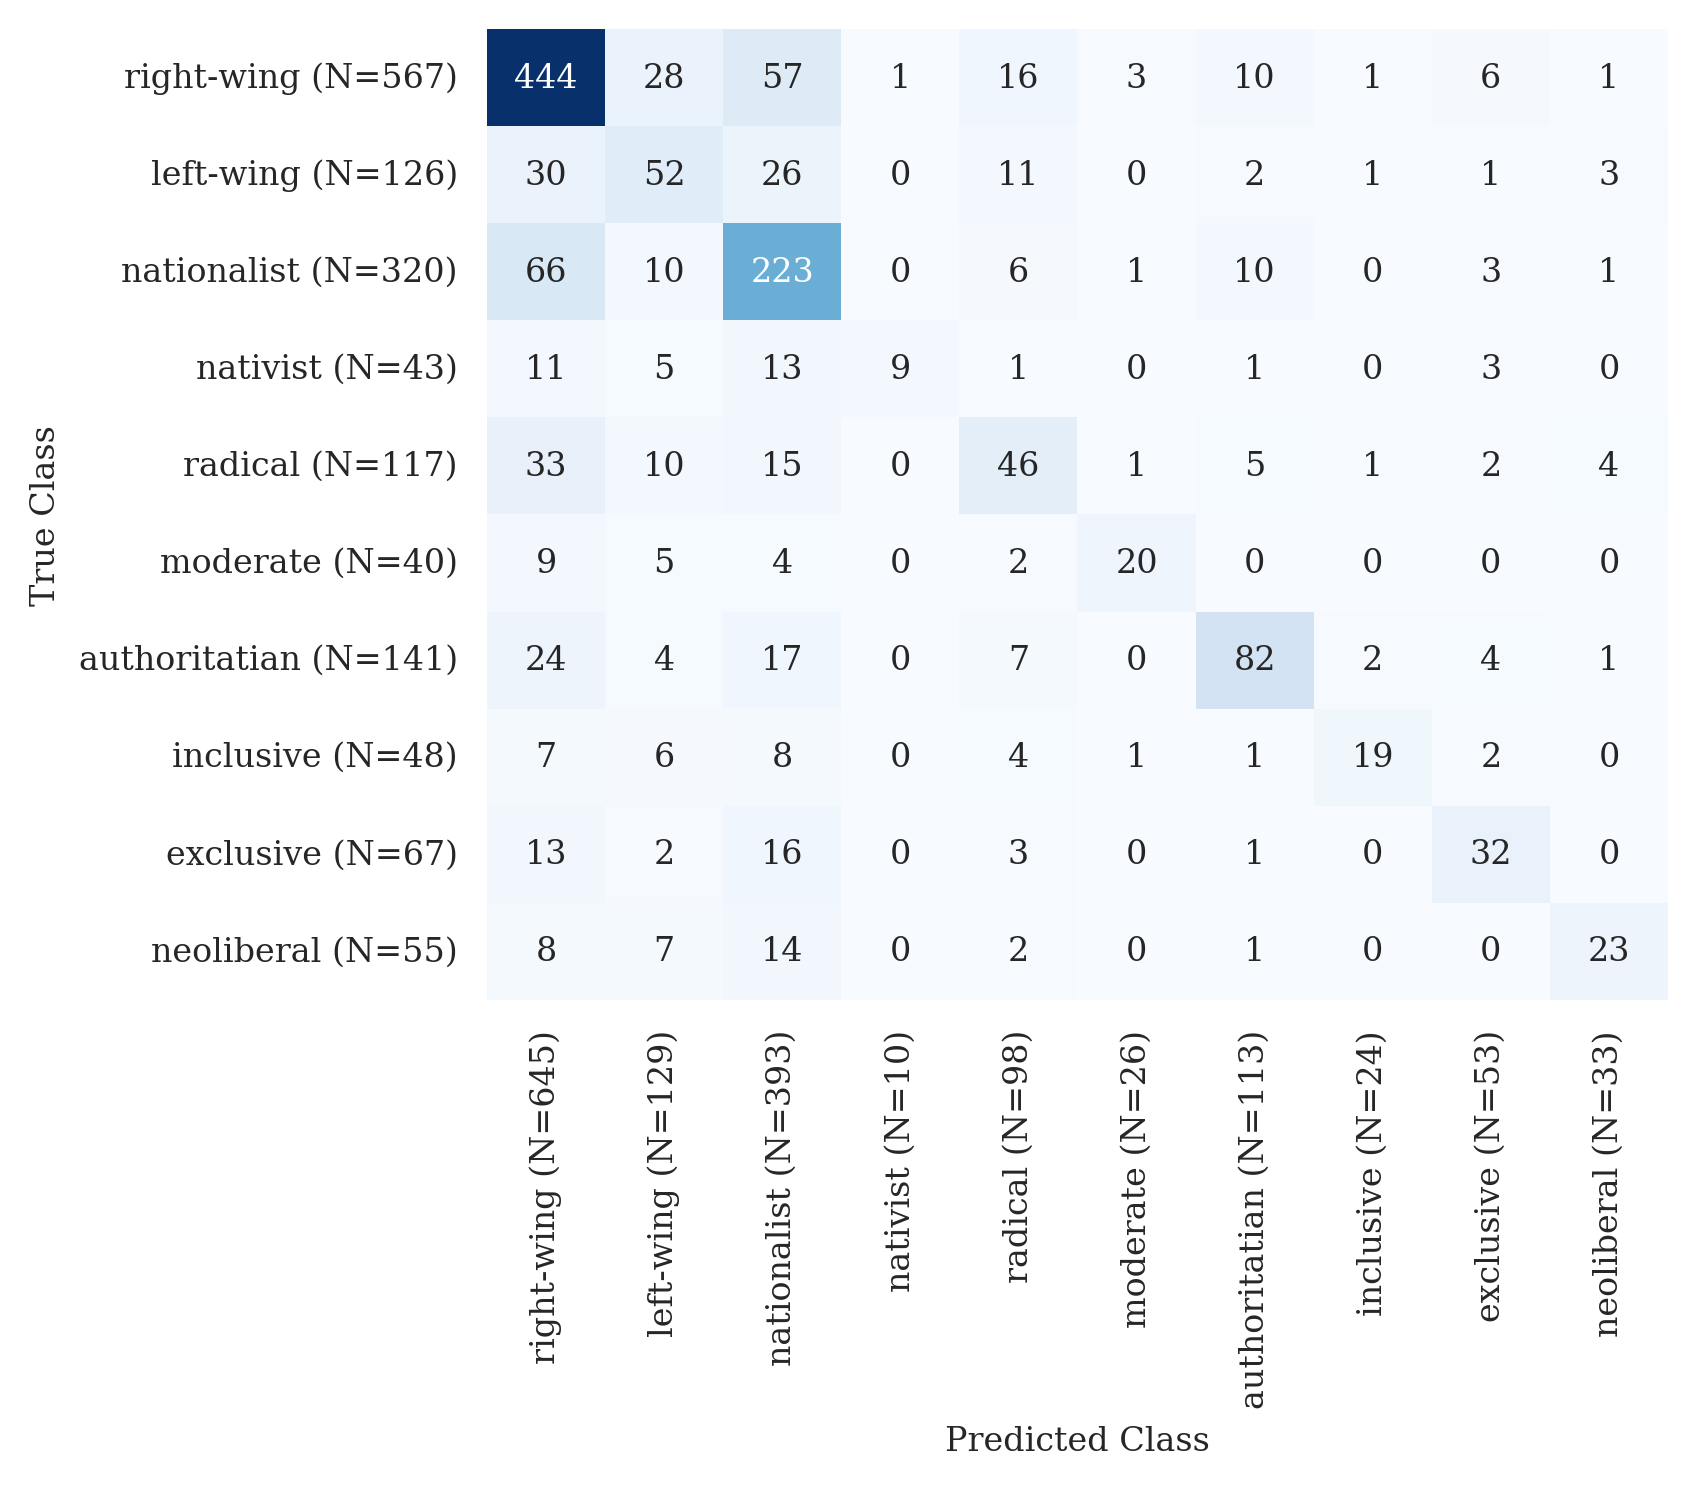

In [328]:
plt.style.use("fast")
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.size'] = 8

fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='d', ax=ax)

ax.set_ylabel("True Class")
ax.set_xlabel("Predicted Class")
plt.show()

# Matrix as network

In [329]:
labels_mapping = dict([(i,label) for i, label in enumerate(labels)])
classes_inxs = dict(zip(labels, range(len(labels))))
classes_inxs

{'right-wing': 0,
 'left-wing': 1,
 'nationalist': 2,
 'nativist': 3,
 'radical': 4,
 'moderate': 5,
 'authoritatian': 6,
 'inclusive': 7,
 'exclusive': 8,
 'neoliberal': 9}

In [330]:
labels_mapping

{0: 'right-wing',
 1: 'left-wing',
 2: 'nationalist',
 3: 'nativist',
 4: 'radical',
 5: 'moderate',
 6: 'authoritatian',
 7: 'inclusive',
 8: 'exclusive',
 9: 'neoliberal'}

In [331]:
matrix = confusion_matrix(y_test, y_predicted, labels=labels, normalize="true")
matrix

array([[0.78306878, 0.04938272, 0.1005291 , 0.00176367, 0.02821869,
        0.00529101, 0.01763668, 0.00176367, 0.01058201, 0.00176367],
       [0.23809524, 0.41269841, 0.20634921, 0.        , 0.08730159,
        0.        , 0.01587302, 0.00793651, 0.00793651, 0.02380952],
       [0.20625   , 0.03125   , 0.696875  , 0.        , 0.01875   ,
        0.003125  , 0.03125   , 0.        , 0.009375  , 0.003125  ],
       [0.25581395, 0.11627907, 0.30232558, 0.20930233, 0.02325581,
        0.        , 0.02325581, 0.        , 0.06976744, 0.        ],
       [0.28205128, 0.08547009, 0.12820513, 0.        , 0.39316239,
        0.00854701, 0.04273504, 0.00854701, 0.01709402, 0.03418803],
       [0.225     , 0.125     , 0.1       , 0.        , 0.05      ,
        0.5       , 0.        , 0.        , 0.        , 0.        ],
       [0.17021277, 0.02836879, 0.12056738, 0.        , 0.04964539,
        0.        , 0.58156028, 0.0141844 , 0.02836879, 0.0070922 ],
       [0.14583333, 0.125     , 0.1666666

In [332]:
matrix.diagonal()

array([0.78306878, 0.41269841, 0.696875  , 0.20930233, 0.39316239,
       0.5       , 0.58156028, 0.39583333, 0.47761194, 0.41818182])

In [333]:
import networkx as nx

In [334]:
M = nx.from_numpy_matrix(matrix, parallel_edges=True, create_using=nx.MultiDiGraph)

In [335]:
M.remove_edges_from(nx.selfloop_edges(M))
M.edges(data=True)

OutMultiEdgeDataView([(0, 1, {'weight': 0.04938271604938271}), (0, 2, {'weight': 0.10052910052910052}), (0, 3, {'weight': 0.001763668430335097}), (0, 4, {'weight': 0.02821869488536155}), (0, 5, {'weight': 0.005291005291005291}), (0, 6, {'weight': 0.01763668430335097}), (0, 7, {'weight': 0.001763668430335097}), (0, 8, {'weight': 0.010582010582010581}), (0, 9, {'weight': 0.001763668430335097}), (1, 0, {'weight': 0.23809523809523808}), (1, 2, {'weight': 0.20634920634920634}), (1, 4, {'weight': 0.0873015873015873}), (1, 6, {'weight': 0.015873015873015872}), (1, 7, {'weight': 0.007936507936507936}), (1, 8, {'weight': 0.007936507936507936}), (1, 9, {'weight': 0.023809523809523808}), (2, 0, {'weight': 0.20625}), (2, 1, {'weight': 0.03125}), (2, 4, {'weight': 0.01875}), (2, 5, {'weight': 0.003125}), (2, 6, {'weight': 0.03125}), (2, 8, {'weight': 0.009375}), (2, 9, {'weight': 0.003125}), (3, 0, {'weight': 0.2558139534883721}), (3, 1, {'weight': 0.11627906976744186}), (3, 2, {'weight': 0.3023255

In [336]:
nodes_dict = dict([(i, {"correct" : val}) for i, val in enumerate(matrix.diagonal())])
nodes_dict

{0: {'correct': 0.783068783068783},
 1: {'correct': 0.4126984126984127},
 2: {'correct': 0.696875},
 3: {'correct': 0.20930232558139536},
 4: {'correct': 0.39316239316239315},
 5: {'correct': 0.5},
 6: {'correct': 0.5815602836879432},
 7: {'correct': 0.3958333333333333},
 8: {'correct': 0.47761194029850745},
 9: {'correct': 0.41818181818181815}}

In [337]:
G = nx.Graph()
for u,v,data in M.edges(data=True):
    w = data['weight'] if 'weight' in data else 0
    if G.has_edge(u,v):
        G[u][v]['weight'] = (G[u][v]['weight'] + w) / 2
    else:
        G.add_edge(u, v, weight=w)
nx.set_node_attributes(G, nodes_dict)
G = nx.relabel_nodes(G, labels_mapping)

In [338]:
G.nodes(data=True)

NodeDataView({'right-wing': {'correct': 0.783068783068783}, 'left-wing': {'correct': 0.4126984126984127}, 'nationalist': {'correct': 0.696875}, 'nativist': {'correct': 0.20930232558139536}, 'radical': {'correct': 0.39316239316239315}, 'moderate': {'correct': 0.5}, 'authoritatian': {'correct': 0.5815602836879432}, 'inclusive': {'correct': 0.3958333333333333}, 'exclusive': {'correct': 0.47761194029850745}, 'neoliberal': {'correct': 0.41818181818181815}})

In [339]:
nx.get_edge_attributes(G, "weight")

{('right-wing', 'left-wing'): 0.1437389770723104,
 ('right-wing', 'nationalist'): 0.15338955026455026,
 ('right-wing', 'nativist'): 0.1287888109593536,
 ('right-wing', 'radical'): 0.1551349884683218,
 ('right-wing', 'moderate'): 0.11514550264550265,
 ('right-wing', 'authoritatian'): 0.09392472513039889,
 ('right-wing', 'inclusive'): 0.07379850088183422,
 ('right-wing', 'exclusive'): 0.10230593066413962,
 ('right-wing', 'neoliberal'): 0.07360910694244027,
 ('left-wing', 'nationalist'): 0.11879960317460317,
 ('left-wing', 'radical'): 0.08638583638583638,
 ('left-wing', 'authoritatian'): 0.022120905099628503,
 ('left-wing', 'inclusive'): 0.06646825396825397,
 ('left-wing', 'exclusive'): 0.018893627102582328,
 ('left-wing', 'neoliberal'): 0.07554112554112553,
 ('left-wing', 'nativist'): 0.11627906976744186,
 ('left-wing', 'moderate'): 0.125,
 ('nationalist', 'radical'): 0.07347756410256409,
 ('nationalist', 'moderate'): 0.051562500000000004,
 ('nationalist', 'authoritatian'): 0.07590868794

In [340]:
pos = nx.circular_layout(G)
edge_sizes = [w *10 for w in nx.get_edge_attributes(G, "weight").values()]
edge_sizes
# generate the node positions

[1.437389770723104,
 1.5338955026455026,
 1.287888109593536,
 1.5513498846832179,
 1.1514550264550265,
 0.9392472513039889,
 0.7379850088183422,
 1.0230593066413962,
 0.7360910694244027,
 1.1879960317460316,
 0.8638583638583639,
 0.22120905099628502,
 0.6646825396825397,
 0.18893627102582328,
 0.7554112554112553,
 1.1627906976744187,
 1.25,
 0.734775641025641,
 0.515625,
 0.7590868794326242,
 1.2409048507462686,
 1.2883522727272725,
 3.0232558139534884,
 1.6666666666666665,
 0.23255813953488372,
 0.23255813953488372,
 0.6976744186046512,
 0.29273504273504275,
 0.46190216402982365,
 0.4594017094017094,
 0.30935068248501085,
 0.35275835275835277,
 0.20833333333333331,
 0.1750886524822695,
 0.21647083730284747,
 0.12637008381689233,
 0.41666666666666663]

In [341]:
color_vals = list(nx.get_node_attributes(G, "correct").values())
color_vals

[0.783068783068783,
 0.4126984126984127,
 0.696875,
 0.20930232558139536,
 0.39316239316239315,
 0.5,
 0.5815602836879432,
 0.3958333333333333,
 0.47761194029850745,
 0.41818181818181815]

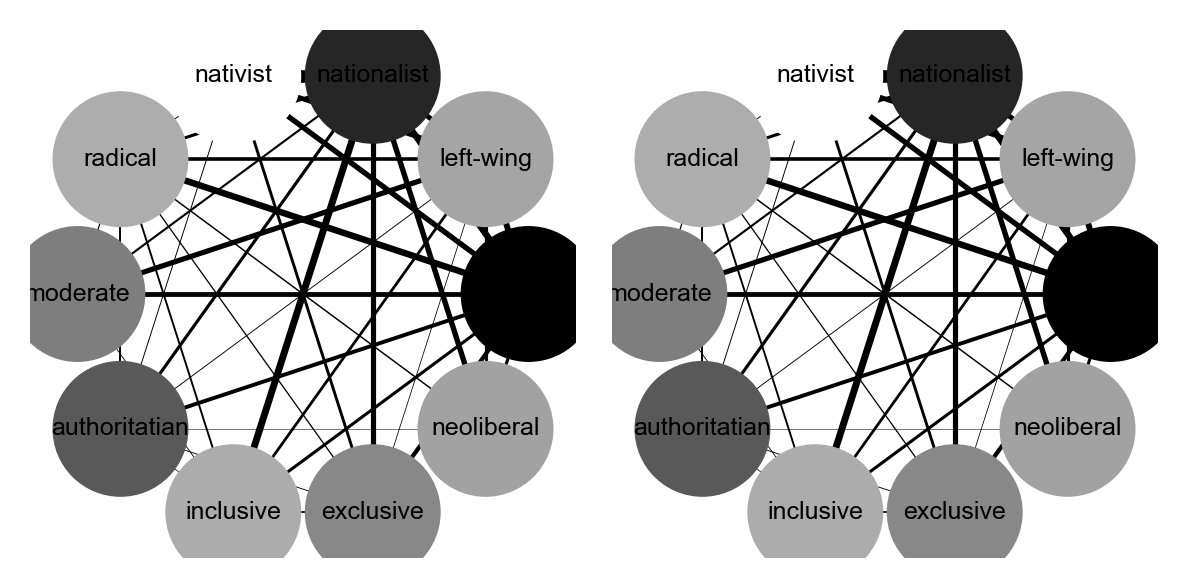

In [360]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(4,2), dpi=300, tight_layout=True)

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=color_vals, cmap=plt.cm.binary, ax=ax1)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax1)
nx.draw_networkx_labels(G, pos=pos, font_size=6, ax=ax1)
ax1.set_axis_off()

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=color_vals, cmap=plt.cm.binary, ax=ax2)
nx.draw_networkx_edges(G, pos, width=edge_sizes, ax=ax2)
nx.draw_networkx_labels(G, pos=pos, font_size=6, ax=ax2)

ax2.set_axis_off()

In [348]:
    # filter test data by year
for year in range(2011,2021):
        filtered_indeces = [i for i, y in enumerate(years_test) if int(y) == year]
        y_test_filtered = np.array(y_test)[filtered_indeces]
        X_test_filtered = X_test[filtered_indeces, :]
        y_predicted_filtered = classifier.predict(X_test_filtered)
        print(year, f1_score(y_predicted_filtered, y_test_filtered, average="weighted"))

2011 0.8375000000000001
2012 0.5573412698412697
2013 0.739767156862745
2014 0.462190785405071
2015 0.5046552890161913
2016 0.6594182742800346
2017 0.5826293756892439
2018 0.6512997432197614
2019 0.6296611271193421
2020 0.6645477345317593


363


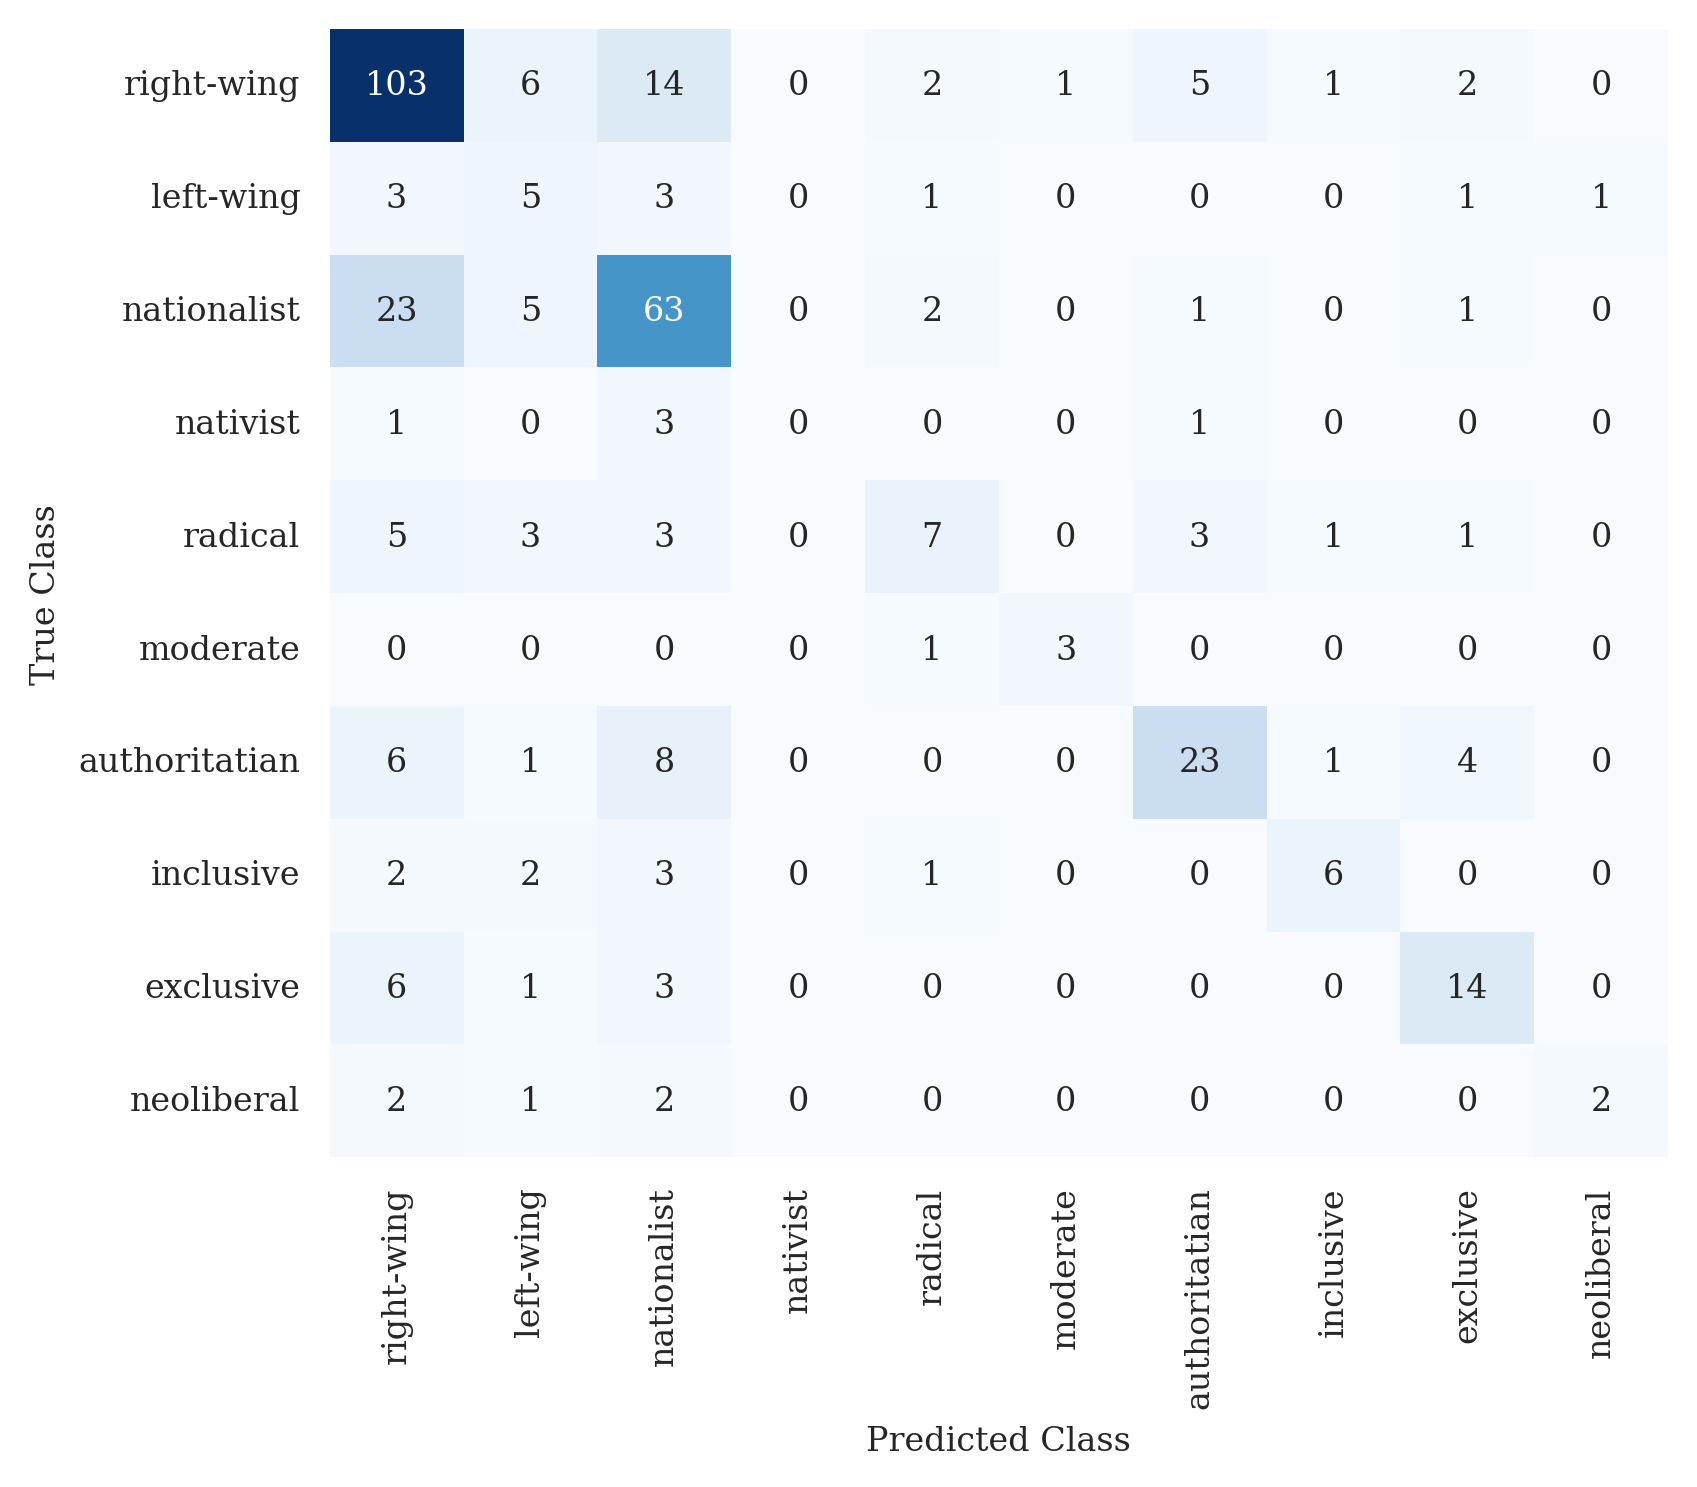

In [350]:
year = 2019
filtered_indeces = [i for i, y in enumerate(years_test) if int(y) == year]
print(len(filtered_indeces))
y_test_filtered = np.array(y_test)[filtered_indeces]
X_test_filtered = X_test[filtered_indeces, :]
y_predicted_filtered = classifier.predict(X_test_filtered)
matrix = confusion_matrix(y_test_filtered, y_predicted_filtered, labels=labels) #, normalize="true")
dataframe = pd.DataFrame(matrix, columns=labels, index=labels)

fig, ax = plt.subplots(figsize=(5.7, 5), dpi=300, tight_layout=True)

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt='d', ax=ax)

ax.set_ylabel("True Class")
ax.set_xlabel("Predicted Class")
plt.show()

In [301]:
matrix.sum()

53

# NN based classification

## Simply neural network

In [126]:
# requires to be connected to a properly configured python environment with tensorflow etc.
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Embedding

In [132]:
classes

['right-wing',
 'nationalist',
 'left-wing',
 'authoritatian',
 'radical',
 'exclusive',
 'moderate',
 'neoliberal',
 'inclusive',
 'nativist']

In [130]:
classes_inxs = dict(zip(classes, range(len(classes))))

In [131]:
classes_inxs

{'right-wing': 0,
 'nationalist': 1,
 'left-wing': 2,
 'authoritatian': 3,
 'radical': 4,
 'exclusive': 5,
 'moderate': 6,
 'neoliberal': 7,
 'inclusive': 8,
 'nativist': 9}

In [128]:
def to_one_hot(y, classes):
    classes_inxs_dict = dict(zip(classes, range(len(classes))))
    results = np.zeros((len(y), len(classes)))
    for i, label in enumerate(y):
        results[i, classes_inxs_dict[label]] = 1.
    return results, classes_inxs_dict

one_hot_labels, classes_inxs_dict = to_one_hot(y, classes)

In [129]:
inxs_classes_dict = dict([(t[1], t[0]) for t in classes_inxs_dict.items()])
inxs_classes_dict

{0: 'right-wing',
 1: 'nationalist',
 2: 'left-wing',
 3: 'authoritatian',
 4: 'radical',
 5: 'exclusive',
 6: 'moderate',
 7: 'neoliberal',
 8: 'inclusive',
 9: 'nativist'}

In [18]:
one_hot_labels[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [44]:
# TRAIN vs TEST

x_train_full, x_test, y_train_full, y_test_one_hot, years_train_full, years_test = train_test_split(X, one_hot_labels, years, test_size=0.2, random_state=1)

# actual TRAIN vs. internal VALIDATION data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=1)

In [20]:
len(years_test)

1524

In [76]:
# since our classes are highly unbalanced w1 weighted is perhaps the best metric for model performance
def f1_weighted(y_true, y_pred):
    y_true = np.ndarray.argmax(y_true.numpy(), axis=1)
    y_pred = np.ndarray.argmax(y_pred.numpy(), axis=1)
    return f1_score(y_true, y_pred, average="weighted")

In [192]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(len(x_train[0]),)))
model.add(layers.Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[f1_weighted])

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 [==============================] - ETA: 0s - loss: 1.9676 - f1_weighted: 0.2075

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 [==============================] - 4s 98ms/step - loss: 1.9676 - f1_weighted: 0.2075 - val_loss: 1.7352 - val_f1_weighted: 0.3005
Epoch 2/10
37/37 [==============================] - 4s 98ms/step - loss: 1.4153 - f1_weighted: 0.4407 - val_loss: 1.4593 - val_f1_weighted: 0.4464
Epoch 3/10
37/37 [==============================] - 3s 92ms/step - loss: 0.8778 - f1_weighted: 0.7001 - val_loss: 1.2551 - val_f1_weighted: 0.5622
Epoch 4/10
37/37 [==============================] - 3s 93ms/step - loss: 0.4338 - f1_weighted: 0.9063 - val_loss: 1.1764 - val_f1_weighted: 0.5996
Epoch 5/10
37/37 [==============================] - 3s 94ms/step - loss: 0.1947 - f1_weighted: 0.9790 - val_loss: 1.1742 - val_f1_weighted: 0.6275
Epoch 6/10
37/37 [==============================] - 3s 88ms/step - loss: 0.0935 - f1_weighted: 0.9974 - val_loss: 1.2127 - val_f1_weighted: 0.6279
Epoch 7/10
37/37 [==============================] - 3s 93ms/step - loss: 0.0528 - f1_weighted: 0.9996 - val_loss: 1.2451 - val_f1

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 62ms/step - loss: 1.2960 - f1_weighted: 0.6288


In [194]:
results = model.evaluate(x_test, y_test_one_hot)
results

 2/47 [>.............................] - ETA: 2s - loss: 0.9033 - f1_weighted: 0.7048

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 62ms/step - loss: 1.2960 - f1_weighted: 0.6288


[1.2959922552108765, 0.6288107633590698]

In [197]:
y_predicted_one_hot = model.predict(x_test)
y_predicted = [inxs_classes_dict[i] for i in np.argmax(y_predicted_one_hot, axis=1)]

47/47 [==============================] - 0s 5ms/step


In [198]:
f1_score(y_predicted, y_test, average="weighted")

0.6548739390014741

In [246]:
inxs_classes_dict

{0: 'right-wing',
 1: 'nationalist',
 2: 'left-wing',
 3: 'authoritatian',
 4: 'radical',
 5: 'exclusive',
 6: 'moderate',
 7: 'neoliberal',
 8: 'inclusive',
 9: 'nativist'}

In [249]:
pd.DataFrame(y_predicted_one_hot[:10].round(2), columns=labels)

,right-wing,nationalist,left-wing,authoritatian,radical,exclusive,moderate,neoliberal,inclusive,nativist
0,0.01,0.01,0.00,0.00,0.97,0.01,0.00,0.00,0.00,0.00
1,0.01,0.80,0.02,0.01,0.11,0.00,0.00,0.04,0.00,0.00
2,0.26,0.02,0.71,0.01,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.02,0.00,0.02,0.00,0.96,0.00,0.00,0.00
4,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.98,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
6,0.06,0.91,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00
7,0.04,0.84,0.02,0.02,0.02,0.00,0.04,0.00,0.01,0.01
8,0.01,0.94,0.00,0.02,0.00,0.00,0.01,0.01,0.00,0.00
9,0.00,0.95,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00


In [255]:
len(np.max(y_predicted_one_hot, axis=1))

1476

In [259]:
sum(np.max(y_predicted_one_hot, axis=1) > 0.75)

917

# Neural networks with embeddings

In [15]:
vocab = [tup[0] for tup in vocab_counts]

In [16]:
w2v = KeyedVectors.load("../data/large_data/w2v_news300.model")
w2v.most_similar("extremism")

[('religious_extremism', 0.8095038533210754),
 ('radicalism', 0.7823387980461121),
 ('violent_extremism', 0.7761071920394897),
 ('Islamic_extremism', 0.7622053027153015),
 ('Islamic_fundamentalism', 0.7453163266181946),
 ('Islamic_radicalism', 0.7362303137779236),
 ('militancy', 0.7344785928726196),
 ('radical_Islam', 0.7271879315376282),
 ('Islamist_extremism', 0.7208510041236877),
 ('extremists', 0.7103613615036011)]

In [17]:
w2v_filtered = KeyedVectors(vector_size=300)
vocab_filtered = []
# Iterate over the original KeyedVectors object
for word in vocab:
    try:
        w2v_filtered[word] = w2v[word]
        vocab_filtered.append(word)
    except:
        pass

In [19]:
w2v_filtered.vectors[0]

array([ 3.78906250e-01,  5.02929688e-02, -3.19824219e-02,  4.02343750e-01,
       -8.93554688e-02, -1.26953125e-01,  3.07617188e-02,  1.50390625e-01,
        6.88476562e-02, -1.47460938e-01, -6.68945312e-02, -9.86328125e-02,
        9.61914062e-02,  4.45312500e-01, -2.85644531e-02,  5.34667969e-02,
       -1.27563477e-02,  3.41796875e-01,  1.18652344e-01, -1.09863281e-01,
        2.12890625e-01,  2.34375000e-01,  2.63671875e-01,  2.27539062e-01,
        5.24902344e-02, -1.16210938e-01, -9.47265625e-02, -1.27929688e-01,
        5.00000000e-01,  2.00195312e-01, -1.87500000e-01,  1.78710938e-01,
        5.03540039e-03,  1.04492188e-01,  2.73437500e-01, -1.90429688e-01,
        5.46875000e-02, -1.74804688e-01,  3.90625000e-02,  6.49414062e-02,
        3.57421875e-01, -2.37304688e-01,  3.94531250e-01, -2.31933594e-02,
       -1.24023438e-01, -4.12597656e-02, -7.56835938e-02,  5.63964844e-02,
        4.62890625e-01, -1.08398438e-01, -1.06933594e-01, -4.58984375e-02,
       -6.83593750e-02, -

In [134]:
max([len(conc) for conc in concs])

20

In [135]:
vectorizer = TextVectorization(
    standardize=None,
    output_mode="int",
    output_sequence_length=20
    #vocabulary=vocab
)

In [136]:
vectorizer.adapt([" ".join(conc) for conc in concs])

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [137]:
#  index 0 is reserved for padding and index 1 is reserved for "out of vocabulary" tokens
vectorizer([["be stupid populist"]])

<tf.Tensor: shape=(1, 20), dtype=int64, numpy=
array([[2967,    1,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [138]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [139]:
voc[:5]

['', '[UNK]', 'populist', 'populism', 'party']

In [140]:
num_tokens = len(voc) + 2
embedding_dim = w2v_filtered.vectors.shape[1]
embedding_matrix = np.zeros((num_tokens, 300))
for word, i in word_index.items():
    try:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = vector = w2v[word]
    except:
        pass

In [141]:
embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [142]:
sequences = vectorizer([" ".join(conc) for conc in concs]).numpy()
sequences[:20]

array([[ 1694,    37,   919,  1055,    56,  1350,   573,     5,   870,
            2,   194,   133,   678,  7081,  5006,   645,   426,    72,
          517, 10304],
       [ 6596,  1309,  4712,  1584,  1048,    36,  5448,   538,   118,
           12,     2,   582,  3968,    94,   142,  1370,     7,  4504,
          956,    84],
       [  118,  1305,     3,   167,   389,   236,   745,   102,   157,
         1654,     2,    10,   687,  2607,  2592,  3722,  6241,  8597,
          517,    12],
       [ 1140,   492,   913,   261,  6663,   499,  2319,  2757,  1133,
           91,     2,  1140,  6493,    21,    84,   461,  1447,   664,
          206,    27],
       [ 2227,   727,  4166,   203,    75,  1599,  2985,  1874,    63,
          103,     2,    10,  1778,     9,   195,  2009,   175,  2027,
           25,  2951],
       [    9,   195,  2009,   175,  2027,    25,  2951,   206,  1151,
            2,  2607,   687,     7,  2339,    49,   637,  2574,     2,
         8382,     7],
       [  

In [163]:
int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(512, 5, activation="relu")(embedded_sequences)
#x = layers.MaxPooling1D(5)(x)
#x = layers.Conv1D(128, 5, activation="relu")(x)
#x = layers.MaxPooling1D(5)(x)
#x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(classes), activation='softmax')(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_2 (Embedding)     (None, None, 300)         4042200   
                                                                 
 conv1d_25 (Conv1D)          (None, None, 512)         768512    
                                                                 
 global_max_pooling1d_16 (Gl  (None, 512)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                          

In [164]:
# TRAIN vs TEST

x_train_full, x_test, y_train_full, y_test_one_hot = train_test_split(sequences, one_hot_labels, test_size=0.2, random_state=1)

# actual TRAIN vs. internal VALIDATION data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=1)

In [165]:
model.compile(
    loss="categorical_crossentropy", optimizer="adam", metrics=[f1_weighted]
)
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


74/74 [==============================] - ETA: 0s - loss: 1.9040 - f1_weighted: 0.2481

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


74/74 [==============================] - 7s 93ms/step - loss: 1.9040 - f1_weighted: 0.2481 - val_loss: 1.7933 - val_f1_weighted: 0.2177
Epoch 2/10
74/74 [==============================] - 7s 91ms/step - loss: 1.6145 - f1_weighted: 0.3801 - val_loss: 1.5688 - val_f1_weighted: 0.4101
Epoch 3/10
74/74 [==============================] - 7s 89ms/step - loss: 1.0555 - f1_weighted: 0.5993 - val_loss: 1.4712 - val_f1_weighted: 0.4837
Epoch 4/10
74/74 [==============================] - 7s 89ms/step - loss: 0.5099 - f1_weighted: 0.8199 - val_loss: 1.5990 - val_f1_weighted: 0.5279
Epoch 5/10
74/74 [==============================] - 6s 87ms/step - loss: 0.2150 - f1_weighted: 0.9384 - val_loss: 2.0242 - val_f1_weighted: 0.4941
Epoch 6/10
74/74 [==============================] - 6s 88ms/step - loss: 0.0868 - f1_weighted: 0.9815 - val_loss: 1.7980 - val_f1_weighted: 0.5629
Epoch 7/10
74/74 [==============================] - 6s 85ms/step - loss: 0.0494 - f1_weighted: 0.9906 - val_loss: 1.9888 - val_f1

In [166]:
results = model.evaluate(x_test, y_test_one_hot)
results

 2/47 [>.............................] - ETA: 2s - loss: 1.4146 - f1_weighted: 0.6781

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 3s 57ms/step - loss: 2.0383 - f1_weighted: 0.5782


[2.0383424758911133, 0.5782015919685364]

In [167]:
y_predicted_one_hot = model.predict(x_test)
y_predicted = [inxs_classes_dict[i] for i in np.argmax(y_predicted_one_hot, axis=1)]

f1_score(y_predicted, y_test, average="weighted")

24/47 [==============>...............] - ETA: 0s

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


47/47 [==============================] - 0s 7ms/step


0.6250736879356592